# Medical Data Visualizer

* Utility Function

In [1]:
def is_overweight(kg,meters):
    bmi = kg/(meters*meters)
    if bmi > 25:
        return 1
    else:
        return 0

## Import Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/kaggle/input/medical-examination/medical_examination.csv')


### Add 'overweight' column

In [3]:
overweights = []
for index, row in df.iterrows():
    overweights.append(is_overweight(row['weight'],row['height']/100))
df['overweight'] = overweights

### Normalize the data

In [4]:
gluc = df['gluc']
new_gluc = []
for g in gluc:
    if g == 1:
        new_gluc.append(0)
    elif g > 1:
        new_gluc.append(1)
    else:
        new_gluc.append(g)
df['gluc'] = new_gluc

cholesterol = df['cholesterol']
new_cholesterol = []
for g in cholesterol:
    if g == 1:
        new_cholesterol.append(0)
    elif g > 1:
        new_cholesterol.append(1)
    else:
        new_cholesterol.append(g)
df['cholesterol'] = new_cholesterol

for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min()) 


### Draw Categorical Plot

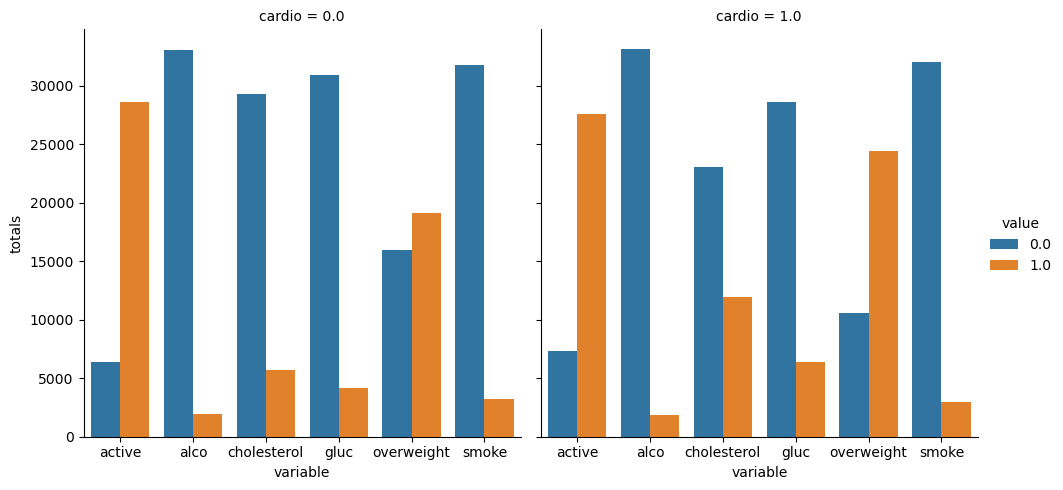

In [5]:
df_cat = pd.melt(df, value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], id_vars="cardio")
fig = sns.catplot(data=df_cat, kind="count", x="variable", hue="value", col="cardio")
fig.set_axis_labels("variable","totals")
fig.savefig('catplot.png')

### Clean the data

In [6]:
indexAge = df[ (df['ap_lo'] <= df['ap_hi']) | 
              (df['height'] <= df['height'].quantile(0.025)) |
              (df['height'] > df['height'].quantile(0.975)) |
              (df['weight'] <= df['weight'].quantile(0.025)) |
              (df['weight'] > df['weight'].quantile(0.975))].index
df.drop(indexAge , inplace=True)

### Draw Heat Map

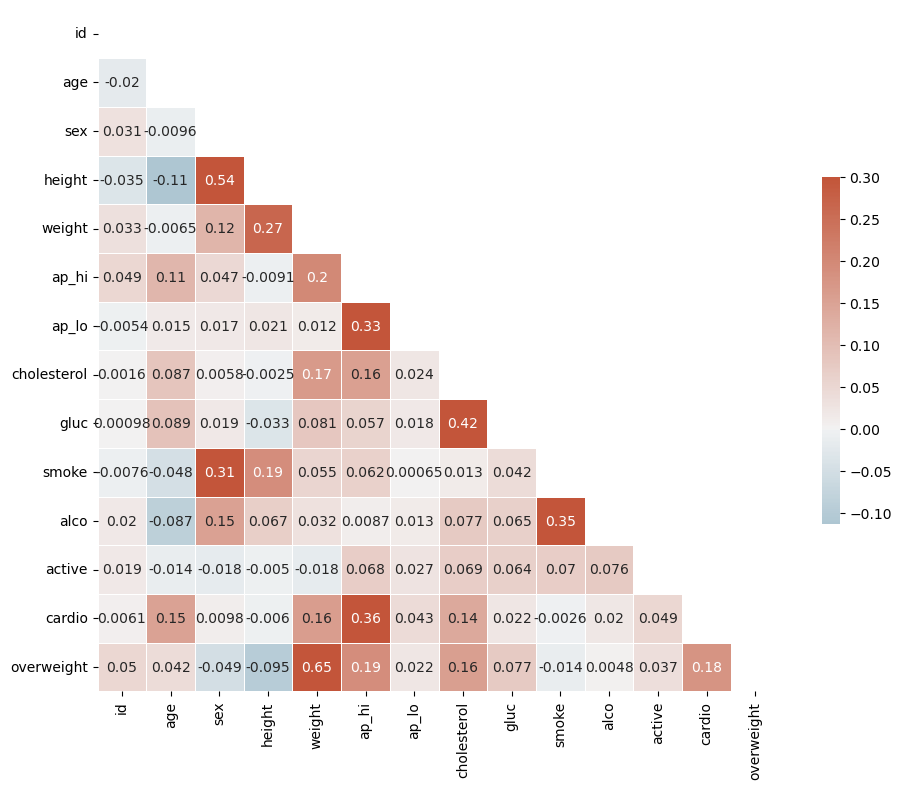

In [7]:
d = pd.DataFrame(data=df,
              columns=list(df.columns))

# # Calculate the correlation matrix
corr = d.corr()

# # Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



# Do not modify the next two lines
fig.savefig('heatmap.png')